In [10]:
import pandas as pd
dados = pd.read_csv('../dados/AIRPOL_data.csv', delimiter=";", header=0)

# Removendo colunas com valores nulos
dados = dados.drop(columns=['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'])
dados

,Country,NUTS_Code,Air_Pollutant,Outcome,Affected_Population,Populated_Area[km2],Air_Pollution_Average[ug/m3],Value
0,Albania,AL,NO2,Asthma,"2337443,00","11299,00","5,50","103,00"
1,Albania,AL,PM2.5,Asthma,"456076,00","11299,00","11,30","231,00"
2,Albania,AL0,NO2,Asthma,"2337443,00","11299,00","5,50","103,00"
3,Albania,AL0,PM2.5,Asthma,"456076,00","11299,00","11,30","231,00"
4,Albania,AL03,PM2.5,Asthma,"149508,00","4041,50","11,30","69,00"
...,...,...,...,...,...,...,...,...
49135,Turkey,TR822,NO2,Stroke,"213615,00","7473,50","9,00","3,00"
49136,Turkey,TRB12,NO2,Stroke,"447268,00","8860,40","12,40","291,00"
49137,Turkey,TRB14,NO2,Stroke,"76591,00","5506,60","12,00","17,00"
49138,Turkey,TRB21,NO2,Stroke,"696344,00","17511,10","11,20","25,00"


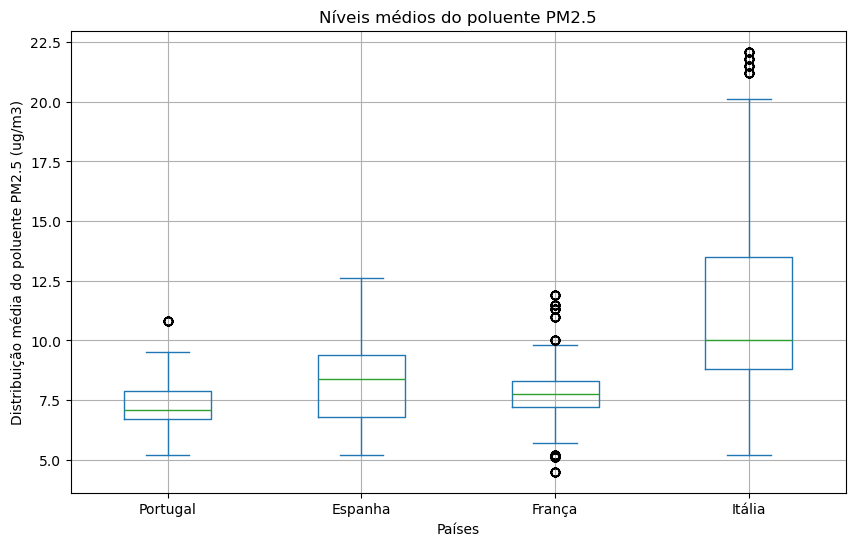

In [11]:
import matplotlib.pyplot as plt

# Filtrar os dados para obter apenas as informações necessárias para a questãopdados_filtrados = dados.filter(['Country', 'NUTS_Code', 'Air_Pollutant', 'Air_Pollution_Average[ug/m3]'])
dados_filtrados = dados.filter(['Country', 'NUTS_Code', 'Air_Pollutant', 'Air_Pollution_Average[ug/m3]'])
# Obter os dados para o poluente PM2.5
dados_pm25 = dados_filtrados[dados_filtrados['Air_Pollutant'] == 'PM2.5']
# Obter os dados para Portugal, Espanha, França e Itália, junto com o código NUTS, para assim poder separar os países como um todo das suas regiões
dados_paises = dados_pm25[dados_pm25['Country'].isin(['Portugal', 'Spain', 'France', 'Italy'])]
# Filtrar os dados para obter apenas as informações necessárias para a questão
dados_paises_filtrados = dados_paises.filter(['Country', 'Air_Pollution_Average[ug/m3]'])

# Obter a poluição média por país
dados_portugal = dados_paises_filtrados[dados_paises_filtrados['Country'] == 'Portugal']
dados_espanha = dados_paises_filtrados[dados_paises_filtrados['Country'] == 'Spain']
dados_franca = dados_paises_filtrados[dados_paises_filtrados['Country'] == 'France']
dados_italia = dados_paises_filtrados[dados_paises_filtrados['Country'] == 'Italy']

# Converter as colunas da poluição média para valores numéricos
dados_portugal = dados_portugal.copy()
dados_espanha = dados_espanha.copy()
dados_franca = dados_franca.copy()
dados_italia = dados_italia.copy()

dados_portugal.loc[:, 'Air_Pollution_Average[ug/m3]'] = dados_portugal['Air_Pollution_Average[ug/m3]'].str.replace(',', '.')
dados_espanha.loc[:, 'Air_Pollution_Average[ug/m3]'] = dados_espanha['Air_Pollution_Average[ug/m3]'].str.replace(',', '.')
dados_franca.loc[:, 'Air_Pollution_Average[ug/m3]'] = dados_franca['Air_Pollution_Average[ug/m3]'].str.replace(',', '.')
dados_italia.loc[:, 'Air_Pollution_Average[ug/m3]'] = dados_italia['Air_Pollution_Average[ug/m3]'].str.replace(',', '.')

dados_portugal['Air_Pollution_Average[ug/m3]'] = pd.to_numeric(dados_portugal['Air_Pollution_Average[ug/m3]'])
dados_espanha['Air_Pollution_Average[ug/m3]'] = pd.to_numeric(dados_espanha['Air_Pollution_Average[ug/m3]'])
dados_franca['Air_Pollution_Average[ug/m3]'] = pd.to_numeric(dados_franca['Air_Pollution_Average[ug/m3]'])
dados_italia['Air_Pollution_Average[ug/m3]'] = pd.to_numeric(dados_italia['Air_Pollution_Average[ug/m3]'])


# Criar uma dataframe com os dados obtidos e na ordem correta
resultado = pd.DataFrame({
    'Portugal': dados_portugal['Air_Pollution_Average[ug/m3]'].dropna(),
    'Espanha': dados_espanha['Air_Pollution_Average[ug/m3]'].dropna(),
    'França': dados_franca['Air_Pollution_Average[ug/m3]'].dropna(),
    'Itália': dados_italia['Air_Pollution_Average[ug/m3]'].dropna(),
})
                      
# Plotar o boxplot
resultado.plot(kind='box', figsize=(10, 6))
plt.title('Níveis médios do poluente PM2.5')
plt.ylabel('Distribuição média do poluente PM2.5 (ug/m3)')
plt.xlabel('Países')
plt.grid()
plt.show()